## Disease Prediction from Symptoms

For this project, we'll be using the dataset from here: http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html

Copy the data from all the columns and paste it into an excel sheet -> `raw_data.xlsx`

In [ ]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

: 

In [2]:
# Read Raw Dataset
df = pd.read_excel('/content/raw_data.xlsx')

In [3]:
df.head()

Disease  Count of Disease Occurrence  \
0  UMLS:C0020538_hypertensive disease                       3363.0   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   

                             Symptom  
0           UMLS:C0008031_pain chest  
1  UMLS:C0392680_shortness of breath  
2            UMLS:C0012833_dizziness  
3             UMLS:C0004093_asthenia  
4                 UMLS:C0085639_fall

In [4]:
# Fill all NaN with the values above
data = df.fillna(method='ffill')

In [5]:
data.head()

Disease  Count of Disease Occurrence  \
0  UMLS:C0020538_hypertensive disease                       3363.0   
1  UMLS:C0020538_hypertensive disease                       3363.0   
2  UMLS:C0020538_hypertensive disease                       3363.0   
3  UMLS:C0020538_hypertensive disease                       3363.0   
4  UMLS:C0020538_hypertensive disease                       3363.0   

                             Symptom  
0           UMLS:C0008031_pain chest  
1  UMLS:C0392680_shortness of breath  
2            UMLS:C0012833_dizziness  
3             UMLS:C0004093_asthenia  
4                 UMLS:C0085639_fall

In [6]:
# Process Disease and Symptom Names
def process_data(data):
    data_list = []
    data_name = data.replace('^','_').split('_')
    n = 1
    for names in data_name:
        if (n % 2 == 0):
            data_list.append(names)
        n += 1
    return data_list

In [7]:
# Data Cleanup
disease_list = []
disease_symptom_dict = defaultdict(list)
disease_symptom_count = {}
count = 0

for idx, row in data.iterrows():

    # Get the Disease Names
    if (row['Disease'] !="\xc2\xa0") and (row['Disease'] != ""):
        disease = row['Disease']
        disease_list = process_data(data=disease)
        count = row['Count of Disease Occurrence']

    # Get the Symptoms Corresponding to Diseases
    if (row['Symptom'] !="\xc2\xa0") and (row['Symptom'] != ""):
        symptom = row['Symptom']
        symptom_list = process_data(data=symptom)
        for d in disease_list:
            for s in symptom_list:
                disease_symptom_dict[d].append(s)
            disease_symptom_count[d] = count

In [8]:
# See that the data is Processed Correctly
disease_symptom_dict

defaultdict(list,
            {'hypertensive disease': ['pain chest',
              'shortness of breath',
              'dizziness',
              'asthenia',
              'fall',
              'syncope',
              'vertigo',
              'sweat',
              'sweating increased',
              'palpitation',
              'nausea',
              'angina pectoris',
              'pressure chest'],
             'diabetes': ['polyuria',
              'polydypsia',
              'shortness of breath',
              'pain chest',
              'asthenia',
              'nausea',
              'orthopnea',
              'rale',
              'sweat',
              'sweating increased',
              'unresponsiveness',
              'mental status changes',
              'vertigo',
              'vomiting',
              'labored breathing'],
             'depression mental': ['feeling suicidal',
              'suicidal',
              'hallucinations auditory',
              'feel

In [9]:
# Count of Disease Occurence w.r.t each Disease
disease_symptom_count

{'hypertensive disease': 3363.0,
 'diabetes': 1421.0,
 'depression mental': 1337.0,
 'depressive disorder': 1337.0,
 'coronary arteriosclerosis': 1284.0,
 'coronary heart disease': 1284.0,
 'pneumonia': 1029.0,
 'failure heart congestive': 963.0,
 'accident\xa0cerebrovascular': 885.0,
 'asthma': 835.0,
 'myocardial infarction': 759.0,
 'hypercholesterolemia': 685.0,
 'infection': 630.0,
 'infection urinary tract': 597.0,
 'anemia': 544.0,
 'chronic obstructive airway disease': 524.0,
 'dementia': 504.0,
 'insufficiency renal': 445.0,
 'confusion': 408.0,
 'degenerative\xa0polyarthritis': 405.0,
 'hypothyroidism': 398.0,
 'anxiety state': 390.0,
 'malignant neoplasms': 354.0,
 'primary malignant neoplasm': 354.0,
 'acquired\xa0immuno-deficiency syndrome': 350.0,
 'HIV': 350.0,
 'hiv infections': 350.0,
 'cellulitis': 341.0,
 'gastroesophageal reflux disease': 325.0,
 'septicemia': 311.0,
 'systemic infection': 311.0,
 'sepsis (invertebrate)': 311.0,
 'deep vein thrombosis': 310.0,
 'deh

In [10]:
# Save cleaned data as CSV
f = open('./cleaned_data.csv', 'w')

with f:
    writer = csv.writer(f)
    for key, val in disease_symptom_dict.items():
        for i in range(len(val)):
            writer.writerow([key, val[i], disease_symptom_count[key]])

In [11]:
# Read Cleaned Data as DF
df = pd.read_csv('./cleaned_data.csv')
df.columns = ['disease', 'symptom', 'occurence_count']
df.head()

disease              symptom  occurence_count
0  hypertensive disease  shortness of breath           3363.0
1  hypertensive disease            dizziness           3363.0
2  hypertensive disease             asthenia           3363.0
3  hypertensive disease                 fall           3363.0
4  hypertensive disease              syncope           3363.0

In [12]:
# Remove any rows with empty values
df.replace(float('nan'), np.nan, inplace=True)
df.dropna(inplace=True)

In [13]:
from sklearn import preprocessing

In [14]:
n_unique = len(df['symptom'].unique())
n_unique

404

In [15]:
df.dtypes

disease             object
symptom             object
occurence_count    float64
dtype: object

In [16]:
# Encode the Labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['symptom'])
print(integer_encoded)

[328  87  28 ... 361 130 122]


In [17]:
# One Hot Encode the Labels
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
onehot_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
len(onehot_encoded[0])

404

In [20]:
cols = np.asarray(df['symptom'].unique())
cols

array(['shortness of breath', 'dizziness', 'asthenia', 'fall', 'syncope',
       'vertigo', 'sweat', 'sweating increased', 'palpitation', 'nausea',
       'angina pectoris', 'pressure chest', 'polyuria', 'polydypsia',
       'pain chest', 'orthopnea', 'rale', 'unresponsiveness',
       'mental status changes', 'vomiting', 'labored breathing',
       'feeling suicidal', 'suicidal', 'hallucinations auditory',
       'feeling hopeless', 'weepiness', 'sleeplessness',
       'motor retardation', 'irritable mood', 'blackout',
       'mood depressed', 'hallucinations visual', 'worry', 'agitation',
       'tremor', 'intoxication', 'verbal auditory hallucinations',
       'energy increased', 'difficulty', 'nightmare',
       'unable to concentrate', 'homelessness', 'hypokinesia',
       'dyspnea on exertion', 'chest tightness', 'cough', 'fever',
       'decreased translucency', 'productive cough', 'pleuritic pain',
       'yellow sputum', 'breath sounds decreased', 'chill', 'rhonchus',
       '

In [21]:
# Create a new dataframe to save OHE labels
df_ohe = pd.DataFrame(columns = cols)
df_ohe.head()

Empty DataFrame
Columns: [shortness of breath, dizziness, asthenia, fall, syncope, vertigo, sweat, sweating increased, palpitation, nausea, angina pectoris, pressure chest, polyuria, polydypsia, pain chest, orthopnea, rale, unresponsiveness, mental status changes, vomiting, labored breathing, feeling suicidal, suicidal, hallucinations auditory, feeling hopeless, weepiness, sleeplessness, motor retardation, irritable mood, blackout, mood depressed, hallucinations visual, worry, agitation, tremor, intoxication, verbal auditory hallucinations, energy increased, difficulty, nightmare, unable to concentrate, homelessness, hypokinesia, dyspnea on exertion, chest tightness, cough, fever, decreased translucency, productive cough, pleuritic pain, yellow sputum, breath sounds decreased, chill, rhonchus, green sputum, non-productive cough, wheezing, haemoptysis, distress respiratory, tachypnea, malaise, night sweat, jugular venous distention, dyspnea, dysarthria, speech slurred, facial paresis, hemiplegia, seizure, numbness, symptom aggravating factors, st segment elevation, st segment depression, t wave inverted, presence of q wave, chest discomfort, bradycardia, pain, nonsmoker, erythema, hepatosplenomegaly, pruritus, diarrhea, abscess bacterial, swelling, apyrexial, dysuria, hematuria, renal angle tenderness, lethargy, hyponatremia, hemodynamically stable, difficulty passing urine, consciousness clear, guaiac positive, monoclonal, ecchymosis, tumor cell invasion, haemorrhage, pallor, ...]
Index: []

[0 rows x 404 columns]

In [22]:
for i in range(len(onehot_encoded)):
    df_ohe.loc[i] = onehot_encoded[i]

In [23]:
df_ohe.head()

shortness of breath  dizziness  asthenia  fall  syncope  vertigo  sweat  \
0                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
1                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
2                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
3                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
4                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   

   sweating increased  palpitation  nausea  ...  feces in rectum  prodrome  \
0                 0.0          0.0     0.0  ...              0.0       0.0   
1                 0.0          0.0     0.0  ...              0.0       0.0   
2                 0.0          0.0     0.0  ...              0.0       0.0   
3                 0.0          0.0     0.0  ...              0.0       0.0   
4                 0.0          0.0     0.0  ...              0.0       0.0   

   hypoproteinemia  alcohol binge episode  abdomen acute  air fluid level  \
0              0.0                    0.0            0.0              0.0   
1              0.0                    0.0            0.0              0.0   
2              0.0                    0.0            0.0              0.0   
3              0.0                    0.0            0.0              0.0   
4              0.0                    0.0            0.0              0.0   

   catching breath  large-for-dates fetus  immobile  homicidal thoughts  
0              0.0                    0.0       0.0                 0.0  
1              0.0                    0.0       0.0                 0.0  
2              0.0                    0.0       0.0                 0.0  
3              0.0                    0.0       0.0                 0.0  
4              0.0                    0.0       0.0                 0.0  

[5 rows x 404 columns]

In [24]:
len(df_ohe)

2126

In [25]:
# Disease Dataframe
df_disease = df['disease']
df_disease.head()

0    hypertensive disease
1    hypertensive disease
2    hypertensive disease
3    hypertensive disease
4    hypertensive disease
Name: disease, dtype: object

In [26]:
# Concatenate OHE Labels with the Disease Column
df_concat = pd.concat([df_disease,df_ohe], axis=1)
df_concat.head()

disease  shortness of breath  dizziness  asthenia  fall  \
0  hypertensive disease                  0.0        0.0       0.0   0.0   
1  hypertensive disease                  0.0        0.0       0.0   0.0   
2  hypertensive disease                  0.0        0.0       0.0   0.0   
3  hypertensive disease                  0.0        0.0       0.0   0.0   
4  hypertensive disease                  0.0        0.0       0.0   0.0   

   syncope  vertigo  sweat  sweating increased  palpitation  ...  \
0      0.0      0.0    0.0                 0.0          0.0  ...   
1      0.0      0.0    0.0                 0.0          0.0  ...   
2      0.0      0.0    0.0                 0.0          0.0  ...   
3      0.0      0.0    0.0                 0.0          0.0  ...   
4      0.0      0.0    0.0                 0.0          0.0  ...   

   feces in rectum  prodrome  hypoproteinemia  alcohol binge episode  \
0              0.0       0.0              0.0                    0.0   
1              0.0       0.0              0.0                    0.0   
2              0.0       0.0              0.0                    0.0   
3              0.0       0.0              0.0                    0.0   
4              0.0       0.0              0.0                    0.0   

   abdomen acute  air fluid level  catching breath  large-for-dates fetus  \
0            0.0              0.0              0.0                    0.0   
1            0.0              0.0              0.0                    0.0   
2            0.0              0.0              0.0                    0.0   
3            0.0              0.0              0.0                    0.0   
4            0.0              0.0              0.0                    0.0   

   immobile  homicidal thoughts  
0       0.0                 0.0  
1       0.0                 0.0  
2       0.0                 0.0  
3       0.0                 0.0  
4       0.0                 0.0  

[5 rows x 405 columns]

In [27]:
df_concat.drop_duplicates(keep='first',inplace=True)

In [28]:
df_concat.head()

disease  shortness of breath  dizziness  asthenia  fall  \
0  hypertensive disease                  0.0        0.0       0.0   0.0   
1  hypertensive disease                  0.0        0.0       0.0   0.0   
2  hypertensive disease                  0.0        0.0       0.0   0.0   
3  hypertensive disease                  0.0        0.0       0.0   0.0   
4  hypertensive disease                  0.0        0.0       0.0   0.0   

   syncope  vertigo  sweat  sweating increased  palpitation  ...  \
0      0.0      0.0    0.0                 0.0          0.0  ...   
1      0.0      0.0    0.0                 0.0          0.0  ...   
2      0.0      0.0    0.0                 0.0          0.0  ...   
3      0.0      0.0    0.0                 0.0          0.0  ...   
4      0.0      0.0    0.0                 0.0          0.0  ...   

   feces in rectum  prodrome  hypoproteinemia  alcohol binge episode  \
0              0.0       0.0              0.0                    0.0   
1              0.0       0.0              0.0                    0.0   
2              0.0       0.0              0.0                    0.0   
3              0.0       0.0              0.0                    0.0   
4              0.0       0.0              0.0                    0.0   

   abdomen acute  air fluid level  catching breath  large-for-dates fetus  \
0            0.0              0.0              0.0                    0.0   
1            0.0              0.0              0.0                    0.0   
2            0.0              0.0              0.0                    0.0   
3            0.0              0.0              0.0                    0.0   
4            0.0              0.0              0.0                    0.0   

   immobile  homicidal thoughts  
0       0.0                 0.0  
1       0.0                 0.0  
2       0.0                 0.0  
3       0.0                 0.0  
4       0.0                 0.0  

[5 rows x 405 columns]

In [29]:
len(df_concat)

2097

In [30]:
cols = df_concat.columns
cols

Index(['disease', 'shortness of breath', 'dizziness', 'asthenia', 'fall',
       'syncope', 'vertigo', 'sweat', 'sweating increased', 'palpitation',
       ...
       'feces in rectum', 'prodrome', 'hypoproteinemia',
       'alcohol binge episode', 'abdomen acute', 'air fluid level',
       'catching breath', 'large-for-dates fetus', 'immobile',
       'homicidal thoughts'],
      dtype='object', length=405)

In [31]:
cols = cols[1:]

In [32]:
# Since, every disease has multiple symptoms, combine all symptoms per disease per row
df_concat = df_concat.groupby('disease').sum()
df_concat = df_concat.reset_index()
df_concat[:5]

disease  shortness of breath  dizziness  \
0                  Alzheimer's disease                  0.0        0.0   
1                                  HIV                  0.0        0.0   
2       Pneumocystis carinii pneumonia                  0.0        0.0   
3             accident cerebrovascular                  0.0        0.0   
4  acquired immuno-deficiency syndrome                  0.0        0.0   

   asthenia  fall  syncope  vertigo  sweat  sweating increased  palpitation  \
0       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
1       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
2       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
3       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
4       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   

   ...  feces in rectum  prodrome  hypoproteinemia  alcohol binge episode  \
0  ...              0.0       0.0              0.0                    0.0   
1  ...              0.0       0.0              0.0                    0.0   
2  ...              0.0       0.0              0.0                    0.0   
3  ...              0.0       0.0              0.0                    0.0   
4  ...              0.0       0.0              0.0                    0.0   

   abdomen acute  air fluid level  catching breath  large-for-dates fetus  \
0            0.0              1.0              0.0                    0.0   
1            0.0              0.0              0.0                    0.0   
2            0.0              0.0              0.0                    0.0   
3            0.0              0.0              0.0                    0.0   
4            0.0              0.0              0.0                    0.0   

   immobile  homicidal thoughts  
0       0.0                 0.0  
1       0.0                 0.0  
2       0.0                 1.0  
3       0.0                 0.0  
4       0.0                 0.0  

[5 rows x 405 columns]

In [33]:
len(df_concat)

149

In [34]:
df_concat.to_csv("./training_dataset.csv", index=False)

In [35]:
# One Hot Encoded Features
X = df_concat[cols]

# Labels
y = df_concat['disease']

## Model Training

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [37]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [38]:
len(X_train), len(y_train)

(119, 119)

In [39]:
len(X_test), len(y_test)

(30, 30)

In [40]:
print(X_test)

     shortness of breath  dizziness  asthenia  fall  syncope  vertigo  sweat  \
16                   0.0        0.0       0.0   0.0      0.0      0.0    0.0   
55                   0.0        0.0       0.0   0.0      0.0      0.0    0.0   
124                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
89                   0.0        0.0       0.0   0.0      0.0      0.0    0.0   
32                   0.0        0.0       0.0   0.0      0.0      0.0    0.0   
92                   0.0        0.0       0.0   0.0      0.0      0.0    0.0   
91                   0.0        0.0       0.0   0.0      0.0      0.0    0.0   
118                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
69                   0.0        0.0       1.0   0.0      0.0      0.0    0.0   
1                    0.0        0.0       0.0   0.0      0.0      0.0    0.0   
80                   0.0        0.0       0.0   0.0      0.0      0.0    0.0   
67                   0.0        0.0     

In [41]:
X_test.to_csv("./symptoms.csv", index=False)

In [42]:
dt = DecisionTreeClassifier(random_state=101)
clf_dt=dt.fit(X, y)

In [43]:
dt.predict(X_test)

array(['bipolar disorder', 'endocarditis', 'pneumonia', 'ischemia',
       'colitis', 'kidney failure acute', 'kidney disease', 'paranoia',
       'hepatitis', 'HIV', 'hypertensive disease', 'hemiparesis',
       'cirrhosis', 'manic disorder', 'lymphoma', 'sepsis (invertebrate)',
       'paroxysmal\xa0dyspnea', 'malignant\xa0neoplasms',
       'hiv infections', 'confusion', 'gastroesophageal reflux disease',
       'delirium', 'insufficiency renal', 'delusion', 'dementia',
       'cellulitis', 'melanoma', 'glaucoma', 'malignant neoplasms',
       'transient ischemic attack'], dtype=object)

In [44]:
clf_dt.score(X, y)

0.9731543624161074

In [45]:
export_graphviz(dt,
                out_file='./tree.dot',
                feature_names=cols)

In [46]:
!pip install graphviz

In [47]:
from graphviz import Source
from sklearn import tree

graph = Source(export_graphviz(dt,
                out_file=None,
                feature_names=cols))

png_bytes = graph.pipe(format='png')

with open('tree.png','wb') as f:
    f.write(png_bytes)

In [48]:
from IPython.display import Image
Image(png_bytes)

In [49]:
disease_pred = clf_dt.predict(X)

In [50]:
print(disease_pred)

["Alzheimer's disease" 'HIV' 'Pneumocystis\xa0carinii\xa0pneumonia'
 'accident\xa0cerebrovascular' 'acquired\xa0immuno-deficiency syndrome'
 'adenocarcinoma' 'adhesion' 'affect labile' 'anemia' 'anxiety state'
 'aphasia' 'arthritis' 'asthma' 'bacteremia'
 'benign prostatic hypertrophy' 'biliary calculus' 'bipolar disorder'
 'bronchitis' 'candidiasis' 'carcinoma' 'carcinoma breast'
 'carcinoma colon' 'carcinoma of lung' 'carcinoma prostate'
 'cardiomyopathy' 'cellulitis' 'cholecystitis' 'cholelithiasis'
 'chronic alcoholic intoxication' 'chronic kidney failure'
 'chronic obstructive airway disease' 'cirrhosis' 'colitis' 'confusion'
 'coronary arteriosclerosis' 'coronary arteriosclerosis' 'decubitus ulcer'
 'deep vein thrombosis' 'degenerative\xa0polyarthritis'
 'deglutition disorder' 'dehydration' 'delirium' 'delusion' 'dementia'
 'dependence' 'depression mental' 'depression mental' 'diabetes'
 'diverticulitis' 'diverticulosis' 'edema pulmonary'
 'effusion pericardial' 'embolism pulmona

In [51]:
disease_real = y.values

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [53]:
disease_real

array(["Alzheimer's disease", 'HIV',
       'Pneumocystis\xa0carinii\xa0pneumonia',
       'accident\xa0cerebrovascular',
       'acquired\xa0immuno-deficiency syndrome', 'adenocarcinoma',
       'adhesion', 'affect labile', 'anemia', 'anxiety state', 'aphasia',
       'arthritis', 'asthma', 'bacteremia',
       'benign prostatic hypertrophy', 'biliary calculus',
       'bipolar disorder', 'bronchitis', 'candidiasis', 'carcinoma',
       'carcinoma breast', 'carcinoma colon', 'carcinoma of lung',
       'carcinoma prostate', 'cardiomyopathy', 'cellulitis',
       'cholecystitis', 'cholelithiasis',
       'chronic alcoholic intoxication', 'chronic kidney failure',
       'chronic obstructive airway disease', 'cirrhosis', 'colitis',
       'confusion', 'coronary arteriosclerosis', 'coronary heart disease',
       'decubitus ulcer', 'deep vein thrombosis',
       'degenerative\xa0polyarthritis', 'deglutition disorder',
       'dehydration', 'delirium', 'delusion', 'dementia', 'dependence'

In [54]:
for i in range(0, len(disease_real)):
    #if disease_pred[i]==disease_real[i]:
    print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

Pred: Alzheimer's disease
Actual: Alzheimer's disease

Pred: HIV
Actual: HIV

Pred: Pneumocystis carinii pneumonia
Actual: Pneumocystis carinii pneumonia

Pred: accident cerebrovascular
Actual: accident cerebrovascular

Pred: acquired immuno-deficiency syndrome
Actual: acquired immuno-deficiency syndrome

Pred: adenocarcinoma
Actual: adenocarcinoma

Pred: adhesion
Actual: adhesion

Pred: affect labile
Actual: affect labile

Pred: anemia
Actual: anemia

Pred: anxiety state
Actual: anxiety state

Pred: aphasia
Actual: aphasia

Pred: arthritis
Actual: arthritis

Pred: asthma
Actual: asthma

Pred: bacteremia
Actual: bacteremia

Pred: benign prostatic hypertrophy
Actual: benign prostatic hypertrophy

Pred: biliary calculus
Actual: biliary calculus

Pred: bipolar disorder
Actual: bipolar disorder

Pred: bronchitis
Actual: bronchitis

Pred: candidiasis
Actual: candidiasis

Pred: carcinoma
Actual: carcinoma

Pred: carcinoma breast
Actual: carcinoma breast

Pred: carcinoma colon
Actual: carcino

In [55]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


rf_classifier = RandomForestClassifier()



In [68]:
rf = rf_classifier.fit(X, y)



In [71]:
print("Random Forest Accuracy:",rf.score(X_test, y_test) )

Random Forest Accuracy: 0.9666666666666667


In [70]:
from sklearn.model_selection import train_test_split, cross_val_score

# Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
gb = gb_classifier.fit(X, y)


print("Gradient Boosting Accuracy:", gb.score(X_test, y_test))



Gradient Boosting Accuracy: 0.9666666666666667


In [59]:
import pickle

filename = 'model.pk'
pickle.dump(dt,open(filename, 'wb'))


In [60]:
fn = 'test.xlsx'
pickle.dump(X, open(fn, 'wb'))

In [61]:
print(X)

     shortness of breath  dizziness  asthenia  fall  syncope  vertigo  sweat  \
0                    0.0        0.0       0.0   0.0      0.0      0.0    0.0   
1                    0.0        0.0       0.0   0.0      0.0      0.0    0.0   
2                    0.0        0.0       0.0   0.0      0.0      0.0    0.0   
3                    0.0        0.0       0.0   0.0      0.0      0.0    0.0   
4                    0.0        0.0       0.0   0.0      0.0      0.0    0.0   
..                   ...        ...       ...   ...      ...      ...    ...   
144                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
145                  0.0        0.0       1.0   0.0      0.0      0.0    0.0   
146                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
147                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
148                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   

     sweating increased  palpitation  n

In [62]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(X)

array(["Alzheimer's disease", 'HIV',
       'Pneumocystis\xa0carinii\xa0pneumonia',
       'accident\xa0cerebrovascular',
       'acquired\xa0immuno-deficiency syndrome', 'adenocarcinoma',
       'adhesion', 'affect labile', 'anemia', 'anxiety state', 'aphasia',
       'arthritis', 'asthma', 'bacteremia',
       'benign prostatic hypertrophy', 'biliary calculus',
       'bipolar disorder', 'bronchitis', 'candidiasis', 'carcinoma',
       'carcinoma breast', 'carcinoma colon', 'carcinoma of lung',
       'carcinoma prostate', 'cardiomyopathy', 'cellulitis',
       'cholecystitis', 'cholelithiasis',
       'chronic alcoholic intoxication', 'chronic kidney failure',
       'chronic obstructive airway disease', 'cirrhosis', 'colitis',
       'confusion', 'coronary arteriosclerosis',
       'coronary arteriosclerosis', 'decubitus ulcer',
       'deep vein thrombosis', 'degenerative\xa0polyarthritis',
       'deglutition disorder', 'dehydration', 'delirium', 'delusion',
       'dementia', 'd

In [63]:
from sklearn import metrics
print(metrics.classification_report(disease_pred, disease_real))

                                      precision    recall  f1-score   support

                 Alzheimer's disease       1.00      1.00      1.00         1
                                 HIV       1.00      1.00      1.00         1
      Pneumocystis carinii pneumonia       1.00      1.00      1.00         1
            accident cerebrovascular       1.00      1.00      1.00         1
 acquired immuno-deficiency syndrome       1.00      1.00      1.00         1
                      adenocarcinoma       1.00      1.00      1.00         1
                            adhesion       1.00      1.00      1.00         1
                       affect labile       1.00      1.00      1.00         1
                              anemia       1.00      1.00      1.00         1
                       anxiety state       1.00      1.00      1.00         1
                             aphasia       1.00      1.00      1.00         1
                           arthritis       1.00      1.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

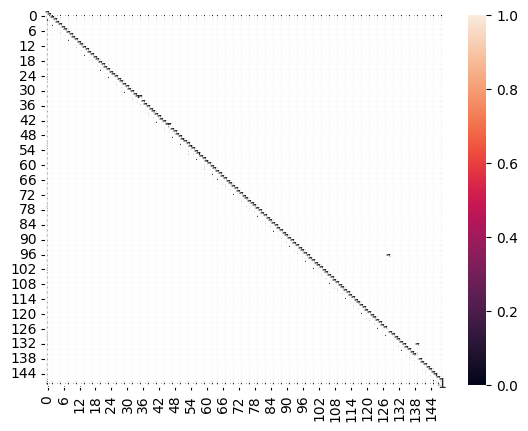

In [64]:
import seaborn as sns
plt.figure()
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(disease_pred, disease_real)
sns.heatmap(cm,annot=True)